### 1. Воздушные перевозки

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).

Данные должны содержать перелеты воздушных судов в 2008 году (вероятно в США)

Домашнее задание №1

Демьяненко Елизавета

**Задание 1:** Рассчитать топ-10 массовых перевозчиков.

In [173]:
import pandas as pd
import numpy as np
%matplotlib inline

сначала прочитаем файл (файл у меня читается не полностью, а только по 2-м первым месяцам, видимо, из-за недостатка памяти на диске)

In [174]:
data = pd.read_csv('2008.csv')

выбираем столбец с названиями перевозчиков, считаем в нем одинаковые названия и выводим 10 наиболее популярных

In [175]:
PR=data['UniqueCarrier'].value_counts().head(10)
PR

WN    195880
OO     95132
MQ     83675
US     76041
UA     74790
XE     67156
NW     60010
DL     57674
AA     52410
EV     45210
Name: UniqueCarrier, dtype: int64

**Задание 2:** Построить распределение причин отмены рейсов

выбираем столбец с причинами отмен, считаем количество повторений каждой причины в таблицы, затем представляем это в виде диаграммы

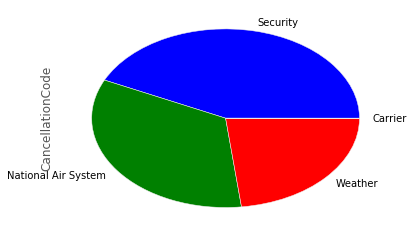

In [176]:
cancellation = data["CancellationCode"]
cancellation.value_counts().plot(kind='pie', labels=['Security','National Air System','Weather','Carrier'])

**Задание 3:** Найти самый популярный маршрут, выдать статистику по данному маршруту.

Сортируем данные по месту вылета и прилета, считаем количество совпадений
Заносим в pl самый популярный маршрут (с наибольшим  кол-вом совпадений)
Находим его заново в таблице и выписываем статистику по нему

In [288]:
res = data.groupby(['Origin','Dest'])['Year'].count().sort_values(ascending=False) 
pl=res.keys()[0] 
print(pl[0],'-',pl[1]) 
data[(data['Origin'] == pl[0]) & (data['Dest'] == pl[1])].describe()


LAX - LAS


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2123,2123.000000,2123.000000,2123.000000,2080.000000,2123.000000,2075.000000,2123.000000,2123.000000,2075.000000,...,2123,2075.000000,2080.000000,2123.000000,2123.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2008,1.460198,15.359868,3.928403,1366.718269,1355.057937,1445.777349,1465.275553,1636.239284,67.626506,...,236,6.733494,15.896154,0.020254,0.002355,14.792157,2.329412,16.505882,0.049020,27.376471
std,0,0.498531,8.710526,1.958225,483.946622,471.423771,499.913963,470.295644,1466.169470,11.654119,...,0,3.997928,10.173615,0.140902,0.048484,36.567401,16.389815,31.969456,0.797558,39.570775
min,2008,1.000000,1.000000,1.000000,5.000000,600.000000,2.000000,14.000000,22.000000,50.000000,...,236,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008,1.000000,8.000000,2.000000,1002.750000,955.000000,1079.500000,1100.000000,574.000000,60.000000,...,236,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008,1.000000,15.000000,4.000000,1327.000000,1325.000000,1429.000000,1440.000000,1492.000000,66.000000,...,236,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,15.000000
75%,2008,2.000000,23.000000,6.000000,1800.000000,1800.000000,1855.000000,1906.000000,2624.000000,72.000000,...,236,8.000000,19.000000,0.000000,0.000000,14.750000,0.000000,17.000000,0.000000,33.750000
max,2008,2.000000,31.000000,7.000000,2352.000000,2305.000000,2400.000000,2358.000000,7720.000000,192.000000,...,236,53.000000,141.000000,1.000000,1.000000,341.000000,190.000000,203.000000,15.000000,221.000000


**Задание 4:** Найти топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?

Выбираем из таблицы номера тех рейсов, которые имеют какой-либо из видов опозданий, считаем количство повторений (т.е. ищем рейсы с наибольшим кол-вом опозданий, можно было бы посчитать по суммарному времени опоздания, но интерпретировать задание можно по-разному) в таких рейсах и выписываем 5 рейсов с наибольшим кол-вом повторений.
Далее к каждому из 5 рейсов приписываем всех перевозчиков, имеющих такой рейс

In [261]:
a=['CarrierDelay' ,'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for j in a:
    c=data[data[j]>0]['FlightNum'].value_counts().head(5)
   
    print('топ-5 рейсов', j ,':' ,*c.index)
    for i in range(5):
        name=c.index[i]
        с1=data[data['FlightNum']==name]['UniqueCarrier'].value_counts().index
        print('Рейс', name, "перевозчики (", *с1, ') ')
    print()

топ-5 рейсов CarrierDelay : 40 534 43 224 39
Рейс 40 перевозчики ( WN HA FL DL B6 AA CO AQ UA US ) 
Рейс 534 перевозчики ( WN UA NW F9 FL B6 US CO DL ) 
Рейс 43 перевозчики ( WN UA XE US HA B6 AQ AS AA ) 
Рейс 224 перевозчики ( WN XE UA F9 US NW AQ CO FL ) 
Рейс 39 перевозчики ( WN HA DL B6 AA UA US FL ) 

топ-5 рейсов WeatherDelay : 143 365 653 4775 1503
Рейс 143 перевозчики ( AS US NW HA UA XE AA WN CO FL B6 ) 
Рейс 365 перевозчики ( US UA NW FL WN AS AA ) 
Рейс 653 перевозчики ( NW F9 UA WN US ) 
Рейс 4775 перевозчики ( 9E EV ) 
Рейс 1503 перевозчики ( WN UA US DL AA NW CO ) 

топ-5 рейсов NASDelay : 365 619 75 473 378
Рейс 365 перевозчики ( US UA NW FL WN AS AA ) 
Рейс 619 перевозчики ( WN XE DL FL NW F9 UA B6 CO ) 
Рейс 75 перевозчики ( US UA FL WN DL B6 AS AA ) 
Рейс 473 перевозчики ( US UA NW FL WN AQ AA CO ) 
Рейс 378 перевозчики ( WN FL AS HA UA F9 CO B6 AA NW US ) 

топ-5 рейсов SecurityDelay : 3948 375 733 1380 2029
Рейс 3948 перевозчики ( WN OO MQ ) 
Рейс 375 перевозчики ( 

**Задание 5:** Определить, как распределено количество рейсов от времени дня?

In [ ]:
data['DepTime'].hist(xlabelsize=10) #рисуем диаграмму на основе столбца

plt.show()

IndexError: list index out of range

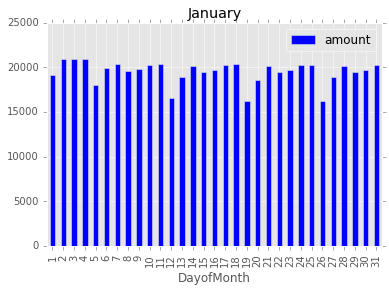

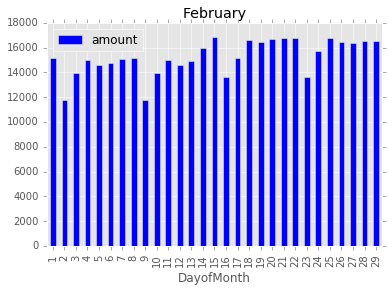

In [182]:
a=['January','February'] #я пишу для заголовков только 2 названия, т.к. данных по другим месяцам у меня нет
for i in range(12):
    result[result['Month']==i+1].plot(x='DayofMonth',y='amount',kind='bar',title=a[i])

Можем заметить, что количество рейсов в течение месяца периодически падает

**Задание 6:** Определить "сезонность" во временных рядах по количеству вылетов на каждый день.

Сгруппируем все имеющиеся данные по месяцу и числу вылета, после чего посчитаем кол-во повторений для всех чисел месяца

In [179]:
season=data[['Month','DayofMonth']]
result=season.groupby(['Month','DayofMonth']).size().reset_index(name='amount')
result.set_index(['Month','DayofMonth'])


amount
Month DayofMonth        
1     1            19187
      2            20954
      3            20937
      4            20929
      5            18069
      6            19897
      7            20347
      8            19604
      9            19820
      10           20305
      11           20349
      12           16572
      13           18947
      14           20178
      15           19504
      16           19768
      17           20277
      18           20348
      19           16255
      20           18653
      21           20133
      22           19505
      23           19771
      24           20258
      25           20314
      26           16282
      27           18922
      28           20149
      29           19498
      30           19767
      31           20266
2     1            15167
      2            11814
      3            13962
      4            15024
      5            14605
      6            14784
      7            15096
      8            15140
      9            11780
      10           13970
      11           15010
      12           14597
      13           14898
      14           15981
      15           16828
      16           13652
      17           15183
      18           16578
      19           16461
      20           16691
      21           16778
      22           16809
      23           13637
      24           15704
      25           16746
      26           16448
      27           16410
      28           16511
      29           16546

In [178]:
data['Day']='Monday' #сначала добавим столбец и заполним его значением "Monday"
c = data[['DayOfWeek','Day']]
c.ix[(c.DayOfWeek==2),['Day']]='Tuesday' #для каждого номера дня недели ставим ему соответствующее название
c.ix[(c.DayOfWeek==3),['Day']]='Wednesday'
c.ix[(c.DayOfWeek==4),['Day']]='Thursday'
c.ix[(c.DayOfWeek==5),['Day']]='Friday'
c.ix[(c.DayOfWeek==6),['Day']]='Saturday'
c.ix[(c.DayOfWeek==7),['Day']]='Sunday'
c['Number']=1 
d=c[['Day','Number']].groupby(['Day']).sum() #группируем "с" по дню недели и суммируем кол-во повторений
d.reset_index(inplace=True)
d.index=d.index+1
d

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Day,Number
1,Friday,162430
2,Monday,144165
3,Saturday,118061
4,Sunday,135238
5,Thursday,166409
6,Tuesday,159409
7,Wednesday,162863


### 2. Продолжаем изучать Pandas

Ввиду ограниченности времени, мы не успеваем рассмотреть всё на семинарах. Поэтому часть работы ложится на вас..

Загрузите две csv таблицы [отсюда](https://github.com/emorisse/FBI-Hate-Crime-Statistics) и импортируйте через Pandas. В них содержатся агрегированные данные по различным организациям\городам США, содержащие количество обращений по тем или иным случаям нарушения закона. В одной таблице (table13.csv) перечислены управления, которые сообщали об этих случаях, в другой - которые не сообщали.

**Задание 1:** Изучите документации для методов `unique_values`, `isin`. С помощью этой функции, определите, содержатся ли в двух таблицах одни и те же штаты.

In [200]:
from pandas import read_csv
from pandas import unique
df1 = pd.read_csv("table13.csv")
df2 = pd.read_csv("table14.csv")


In [201]:
a1=df1['State'].unique() #выбираем из каждой таблицы список неповторяющихся значений штатов
a2=df2['State'].unique() 
k=0 
nost=[] 
print('Совпадающие штаты:') 
for i in range(50): 
 a3= df2['State'].isin(a1[i:(i+1)]) #рассматриваемый элемент(штат) из 1ой таблицы есть во 2ой
 b = a3.unique() 
 if True in b: #этот элемент еще не повторялся при итерации по 1ой таблице
   print(a1[i]) #выписываем его 
 else: 
   nost.append(a1[i]) #если не содержится в другой таблице, выпишем в другой список 
print('Несовпадающие штаты:') 
print(nost)

Совпадающие штаты:
Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
New_Hampshire
New_Jersey
New_Mexico
New_York
North_Carolina
North_Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode_Island
South_Carolina
South_Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West_Virginia
Wisconsin
Wyoming
Несовпадающие штаты:
['DC', 'Nevada']


**Задание 2:** Изучите документации для методов `append`, `merge` и `concat`. Совместите две таблицы в одну.

In [211]:
unite = df1.append(df2)
unite

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,0,1,0,1,NaN,NaN,Florence,Cities,0,0,...,0,"39,481",NaN,NaN,NaN,NaN,2,0,0,Alabama
1,0,1,0,0,NaN,NaN,Hoover,Cities,0,0,...,0,"84,139",NaN,NaN,NaN,NaN,0,0,1,Alabama
2,1,0,1,0,NaN,NaN,Prattville,Cities,0,0,...,0,"35,154",NaN,NaN,NaN,NaN,2,0,0,Alabama
3,0,0,1,0,NaN,NaN,Tuscaloosa,Cities,0,0,...,0,"94,126",NaN,NaN,NaN,NaN,1,0,0,Alabama
4,2,3,3,0,NaN,NaN,Anchorage,Cities,0,0,...,0,"299,455",NaN,NaN,NaN,NaN,8,0,0,Alaska
5,1,0,0,NaN,NaN,NaN,Apache Junction,Cities,0,0,...,0,"36,626",NaN,NaN,NaN,NaN,1,0,0,Arizona
6,1,1,3,0,NaN,NaN,Avondale,Cities,0,1,...,0,"78,905",NaN,NaN,NaN,NaN,4,0,0,Arizona
7,0,1,0,0,NaN,NaN,Eagar,Cities,0,1,...,0,"5,034",NaN,NaN,NaN,NaN,0,0,0,Arizona
8,0,0,1,0,NaN,NaN,El Mirage,Cities,0,0,...,0,"32,837",NaN,NaN,NaN,NaN,1,0,0,Arizona
9,1,0,0,0,NaN,NaN,Gilbert,Cities,0,0,...,0,"225,232",NaN,NaN,NaN,NaN,1,0,0,Arizona


**Задание 3:** Изучите документации для методов `drop_dublicates` и `dropna`. Используйте метод `dropna` для очистки большой таблицы от пропусков. Что произошло? Почему? Исправьте таблицы, чтобы получить корректный ответ.

In [212]:
unite.dropna()

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State


В таблице удалились все строки из-за несовпадений столбцов таблиц. При использовании метода aрpend строки одной таблицы дописываются к другой, поэтому различие в столбцах привело к наличию NaN в каждой строке

Заметим, что некоторых столбцов нет в таблице 2, что приводит к тому,что при объединении таблиц будет выводиться None. Для этого
создадим новые колонки в таблице 2, со значением "no"

In [234]:
a=['Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability','Gender', 'Gender Identity']
for i in a:
    df2[i]='No'

Заметим, что в 1-ой таблице столбцы с названиями 1st quarter, 2nd quarter, 3rd quarter, 4th quarter называются Q1, Q2, Q3, Q4. Заменим их, чтобы названия совпадали в каждой из таблиц.

In [235]:
df1.rename(columns={'Agency name':'Agency Name'}, inplace=True)
df1.rename(columns={'Agency type':'Agency Type'}, inplace=True)
df1.rename(columns={'1st quarter':'Q1'}, inplace=True)
df1.rename(columns={'2nd quarter':'Q2'}, inplace=True)
df1.rename(columns={'3rd quarter':'Q3'}, inplace=True)
df1.rename(columns={'4th quarter':'Q4'}, inplace=True)
unite = df1.append(df2)
unite

,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,Florence,Cities,0,0,0,0,"39,481",0,1,0,1,2,0,0,Alabama
1,Hoover,Cities,0,0,0,0,"84,139",0,1,0,0,0,0,1,Alabama
2,Prattville,Cities,0,0,0,0,"35,154",1,0,1,0,2,0,0,Alabama
3,Tuscaloosa,Cities,0,0,0,0,"94,126",0,0,1,0,1,0,0,Alabama
4,Anchorage,Cities,0,0,0,0,"299,455",2,3,3,0,8,0,0,Alaska
5,Apache Junction,Cities,0,0,0,0,"36,626",1,0,0,NaN,1,0,0,Arizona
6,Avondale,Cities,0,1,0,0,"78,905",1,1,3,0,4,0,0,Arizona
7,Eagar,Cities,0,1,0,0,"5,034",0,1,0,0,0,0,0,Arizona
8,El Mirage,Cities,0,0,0,0,"32,837",0,0,1,0,1,0,0,Arizona
9,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,0,1,0,0,Arizona


**Задание 4:** Изучите документации для методов `set_index`, `reset_index` и `pivot_table`. Проиндексируйте общую таблицу по переменным State и Agency Type (одновременно). У вас должен появиться *мультииндекс*.

In [236]:

result=unite.dropna()
result

,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,Florence,Cities,0,0,0,0,"39,481",0,1,0,1,2,0,0,Alabama
1,Hoover,Cities,0,0,0,0,"84,139",0,1,0,0,0,0,1,Alabama
2,Prattville,Cities,0,0,0,0,"35,154",1,0,1,0,2,0,0,Alabama
3,Tuscaloosa,Cities,0,0,0,0,"94,126",0,0,1,0,1,0,0,Alabama
4,Anchorage,Cities,0,0,0,0,"299,455",2,3,3,0,8,0,0,Alaska
6,Avondale,Cities,0,1,0,0,"78,905",1,1,3,0,4,0,0,Arizona
7,Eagar,Cities,0,1,0,0,"5,034",0,1,0,0,0,0,0,Arizona
8,El Mirage,Cities,0,0,0,0,"32,837",0,0,1,0,1,0,0,Arizona
9,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,0,1,0,0,Arizona
10,Glendale,Cities,0,1,0,0,"234,006",2,0,3,2,2,3,1,Arizona


In [238]:
result=unite.dropna()
result=result.sort_values(['State','Agency Type'])
result2=result.set_index(['State','Agency Type'])
result2

Agency Name  \
State   Agency Type                                                             
Alabama Cities                                                       Florence   
        Cities                                                         Hoover   
        Cities                                                     Prattville   
        Cities                                                     Tuscaloosa   
        Cities                                                        Ashford   
        Cities                                                        Ashland   
        Cities                                                         Auburn   
        Cities                                                   Childersburg   
        Cities                                                      Courtland   
        Cities                                                      Demopolis   
        Cities                                                       Eclectic   
        Cities                                                     Enterprise   
        Cities                                                          Eutaw   
        Cities                                                       Fairhope   
        Cities                                                          Foley   
        Cities                                                        Gadsden   
        Cities                                                         Geneva   
        Cities                                                   Guntersville   
        Cities                                                     Hanceville   
        Cities                                                     Huntsville   
        Cities                                                       Irondale   
        Cities                                                         Jasper   
        Cities                                                      Lafayette   
        Cities                                                   Level Plains   
        Cities                                                   Midland City   
        Cities                                                         Mobile   
        Cities                                                  Muscle Shoals   
        Cities                                                        Oneonta   
        Cities                                                            Opp   
        Cities                                                         Pelham   
...                                                                       ...   
Wyoming Cities                                                       Evanston   
        Cities                                                     Evansville   
        Cities                                                       Glenrock   
        Cities                                                    Green River   
        Cities                                                       Greybull   
        Cities                                                       Guernsey   
        Cities                                                          Hanna   
        Cities                                                         Hulett   
        Cities                                                       Kemmerer   
        Cities                                                         Lander   
        Cities                                                        Laramie   
        Cities                                                         Lovell   
        Cities                                                           Lusk   
        Cities                                                          Mills   
        Cities                                                      Moorcroft   
        Cities                                                      Newcastle   
        Cities                                                    Pine Bluffs   
        Cities  

**Задание 5:** В Pandas можно идерировать по DataFrame! Ищучите документации для методов `iteritems`, `iterrows`, а так же посмотрите, как можно итерировать по сгруппированным DataFrame'ам. Выделите подтаблицу, состаящую из данных по 3 произвольным штатам и сгруппируйте её по переменным State и Agency Type. С помощью изученных методов (то есть итеративно) выведите суммарную популяцию по каждой паре <Штат>-<Тип>

In [287]:
tab=unite.set_index(['State','Agency Type']) #выберем 3 штата
st=tab.loc['Alabama':'Arizona'].reset_index()

st['Population']=pd.to_numeric(st['Population'].str.replace(',',''))
rr=pd.DataFrame(st.groupby(['State','Agency Type'])['Population'].sum()) #просуммируем по населению, прдварительно избавившись от ","
rr=rr.dropna()
rr

Population
State   Agency Type                          
Alabama Cities                        1029459
        Universities and Colleges       19854
Alaska  Cities                         473880
        Universities and Colleges       26720
Arizona Cities                        4926154
        Universities and Colleges      187881

## 3. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [245]:
import pandas as pd
import numpy as np

матрица

In [263]:
table3 = read_csv("accord_sedan_training.csv")
a=table3.values

mat=np.zeros([len(a),2])
for i in range(len(a)):
    mat[i][0]=1
    mat[i][1]=a[i][1]
print(mat)


[[  1.00000000e+00   6.76970000e+04]
 [  1.00000000e+00   7.37380000e+04]
 [  1.00000000e+00   8.03130000e+04]
 [  1.00000000e+00   8.60960000e+04]
 [  1.00000000e+00   7.96070000e+04]
 [  1.00000000e+00   9.69660000e+04]
 [  1.00000000e+00   1.26150000e+05]
 [  1.00000000e+00   1.19255000e+05]
 [  1.00000000e+00   7.35130000e+04]
 [  1.00000000e+00   5.06490000e+04]
 [  1.00000000e+00   9.00000000e+04]
 [  1.00000000e+00   1.14340000e+05]
 [  1.00000000e+00   7.52700000e+04]
 [  1.00000000e+00   5.46850000e+04]
 [  1.00000000e+00   6.84800000e+04]
 [  1.00000000e+00   1.07290000e+05]
 [  1.00000000e+00   3.91440000e+04]
 [  1.00000000e+00   4.28930000e+04]
 [  1.00000000e+00   1.03650000e+05]
 [  1.00000000e+00   5.91000000e+04]
 [  1.00000000e+00   9.64040000e+04]
 [  1.00000000e+00   5.94660000e+04]
 [  1.00000000e+00   8.96920000e+04]
 [  1.00000000e+00   9.14860000e+04]
 [  1.00000000e+00   9.02560000e+04]
 [  1.00000000e+00   8.59760000e+04]
 [  1.00000000e+00   1.03833000e+05]
 

вектор

In [248]:
y=list(table3['price'])
print(y)

[14995, 11988, 11999, 12995, 11333, 10067, 8999, 10595, 13988, 13990, 12998, 10975, 12989, 14590, 16120, 9880, 12991, 13495, 11495, 12000, 12000, 14900, 10499, 11680, 12950, 13681, 10694, 15991, 13995, 11999, 9995, 11995, 9968, 13475, 13900, 13995, 10888, 12995, 8999, 10692, 7995, 9998, 12999, 12791, 13420, 9488, 13250, 10642, 13999, 12599, 11995, 12595, 8495, 12950, 9994, 8991, 12736, 15995, 15991, 9692, 9488, 12495, 12482, 11900, 11757, 9878, 11988, 11995, 10988, 13637, 14888, 11995, 7900, 11037, 12413, 15995, 14999, 9495, 16990, 13995, 12810, 8500, 11949, 10288, 16595, 14995, 10490, 8980, 10995, 11991, 12589, 9000, 9995, 11995, 12895, 14971, 12998, 12441, 13995, 15995, 13000, 10988, 13219, 11988, 11995, 11274, 12995, 12988, 13500, 13850, 7695, 7991, 8998, 13980, 12988, 12995, 12800, 11990, 12998, 8995, 12977, 11991, 10995, 13995, 9686, 8988, 8880, 11394, 7991, 13500, 12838, 11998, 14995, 10890, 15588, 10991, 8950, 12995, 16988, 10665, 12995, 13990, 11900, 11991, 11588, 10750, 10991,

**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

In [249]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import scipy.optimize as opt
import sympy

plt.style.use('ggplot')

%matplotlib inline

In [250]:
n = 30
b_0=np.linspace (-3000,3000,n)
b_1=np.linspace(-1,1,n)
X,Y=np.meshgrid(b_0,b_1)

L=np.zeros(shape=(n,n))
for i in range(n):
    for j in range(n):
        for k in range(len(y)):
            L[i][j]=L[i][j]+(X[i][j]+Y[i][j]*mat[k][1]-y[k])**2
        L[i][j] = L[i][j]/(2*len(y))    

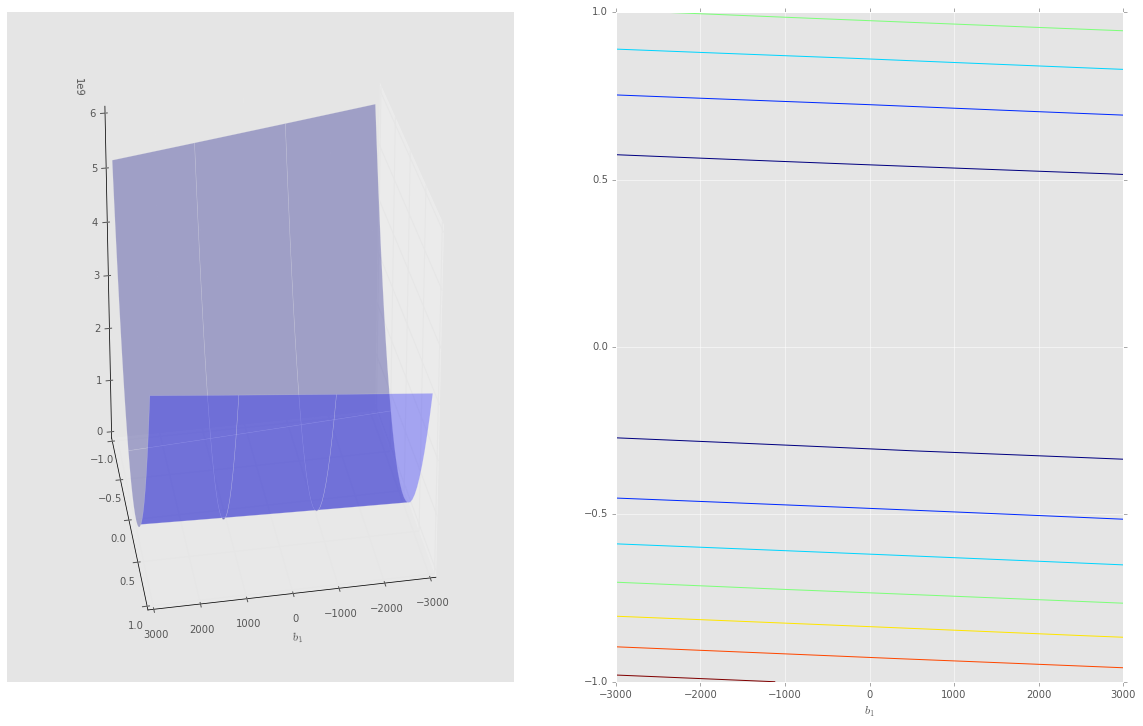

In [251]:
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(1,2,1,projection='3d')
ax.view_init(25,80)
ax.plot_surface(X,Y,L,alpha=0.3,)
ax.set_xlabel('$b_0$')
ax.set_xlabel('$b_1$')

ax=fig.add_subplot(1,2,2)
contour=ax.contour(X,Y,L)
plt.clabel(contour,inline=10,fontsize=100)
ax.set_xlabel('$b_0$')
ax.set_xlabel('$b_1$')

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.

In [289]:
m=np.mat(y).T
m.shape
v=[]
for i in range(len(mat)):
    v.append(mat[i][1])

In [290]:
b_0=1
b_1=1
a=0.001
n=9
b_value=[[0] for i in range(n)]
b=0
dL_0=0
dL_1=0
L=0
for i in range (n):
    dL_0 = 0
    dL_1 = 0
    for j in range(len(y)):
                   dL_0=dL_0+(b_0 + b_1 * mat[j][1] - y[j])
    res1=dL_0/len(y)
  
    for j in range(len(y)):   
                   dL_1=dL_1+(b_0 + b_1 * mat[j][1] - y[j])*mat[j][1]
    res2=dL_1/(len(y))
    b_0 = b_0 - a*res1
    b_1 = b_1 - (a*res2)
    a /= 2
    
    b_value[i]=(b_0,b_1)
    L = 0
print(b_value)

[(-76.642537170263793, -7673775.8095827345), (344267687.07557237, 33468823657345.02), (-750753727685847.75, -7.2986357069533274e+19), (8.1859397082952932e+20, 7.9581611980928528e+25), (-4.4628181639637406e+26, -4.3386376655828517e+31), (1.2165194309983452e+32, 1.182669073739505e+37), (-1.6580488410232572e+37, -1.6119126723841894e+42), (1.1299062385202368e+42, 1.0984659434716702e+47), (-3.8499148573384812e+46, -3.7427887481976891e+51)]


**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

In [254]:
b_value

[(-76.642537170263793, -7673775.8095827345),
 (344267687.07557237, 33468823657345.02),
 (-750753727685847.75, -7.2986357069533274e+19),
 (8.1859397082952932e+20, 7.9581611980928528e+25),
 (-4.4628181639637406e+26, -4.3386376655828517e+31),
 (1.2165194309983452e+32, 1.182669073739505e+37),
 (-1.6580488410232572e+37, -1.6119126723841894e+42),
 (1.1299062385202368e+42, 1.0984659434716702e+47),
 (-3.8499148573384812e+46, -3.7427887481976891e+51)]

После применения алгоритма сходимость не обнаруживается :(

веса признаков

In [255]:
b0, b1 =b_value[-1]
x_l = np.arange(0, 160000, 1000)
y_l = x_l*(b1) +b0

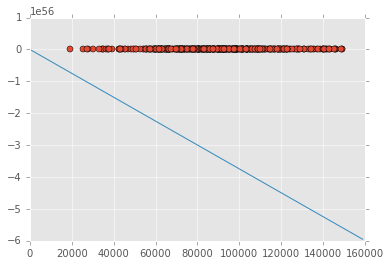

In [256]:
x = [mat[i][1] for i in range(len(mat))]
plt.plot(x, y, "o")
plt.plot(x_l, y_l)